In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import random
import time
import json
from collections import Counter
import os
import copy
import seaborn as sns
import struct

In [2]:
def vals2cdf(vals):
    dist_dict = dict(Counter(vals))
    dist_dict = {k: v for k, v in sorted(dist_dict.items(), key = lambda x: x[0])}
    x = dist_dict.keys()

    pdf = np.asarray(list(dist_dict.values()), dtype=float) / float(sum(dist_dict.values()))
    cdf = np.cumsum(pdf)

    return x, cdf

def get_cdf(filename='tmp.csv', flowkeys = ['srcip', 'dstip', 'srcport', 'dstport', 'proto']):
    df = pd.read_csv(filename)
    
    vals = df.groupby(flowkeys).size().values
    
    x, cdf = vals2cdf(vals)
    return x, cdf

In [3]:
def vals2pdf(vals):
    dist_dict = dict(Counter(vals))
    dist_dict = {k: v for k, v in sorted(dist_dict.items(), key = lambda x: x[0])}
    x = dist_dict.keys()

    pdf = np.asarray(list(dist_dict.values()), dtype=float) / float(sum(dist_dict.values()))

    return x, pdf

def get_pdf(filename='tmp.csv', flowkeys = ['srcip', 'dstip', 'srcport', 'dstport', 'proto']):
    df = pd.read_csv(filename)
    
    vals = df.groupby(flowkeys).size().values
    
    x, pdf = vals2pdf(vals)
    return x, pdf

In [4]:
def plot_cdf(key, val, name = ''):

    # plotting
    fig = plt.figure(figsize = (8, 4))
    ax = fig.add_axes([0, 0, 1, 1])
    plt.xlabel('number of packets', fontsize=20)
    plt.ylabel('probability (%)', fontsize=20)

    plt.title(f'{name}', fontsize=20)
    
    # ax.set_xscale('log')

    ax.plot(key, val, marker='o')

In [5]:
def get_all_filenames(base='./data/caida', upper_bound=0):
    dir_list = [base]
    ret_ll = []

    cnt = 0

    # go through all directory on the `base`
    while dir_list:
        cur_dir = dir_list.pop(0)
        cur_list = os.listdir(cur_dir)
        # go through all directory on a directory
        for cur in cur_list:            
            path = cur_dir + '/' + cur
            # is a pcap file, run pcapParser
            if (os.path.isfile(path)):
                ret_ll.append(path)
                cnt += 1
            # isdirectory, push to list
            else:
                dir_list.append(path)
            # number of files processed is below the upper bound
            if upper_bound != 0 and cnt >= upper_bound:
                print(f'files count: {cnt}')
                return ret_ll
    print(f'files count: {cnt}')
    return ret_ll

In [6]:
# define ip address <--> int converting function
import socket
def ip2long(ip):
    """
    Convert an IP string to long
    """
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

def long2ip(val):
    return socket.inet_ntoa(struct.pack('!L', val))

In [7]:
# base = './data/caida'
# filename_list = get_all_filenames(base, 1)

In [8]:
filename_list = ['./data/caida/20180517/60s/equinix-nyc.dirA.20180517-131100.UTC.anon.csv',
                './data/caida/20180621/60s/equinix-nyc.dirA.20180621-131100.UTC.anon.csv',
                './data/caida/20180816/60s/equinix-nyc.dirA.20180816-131100.UTC.anon.csv',
                './data/caida/20181018/60s/equinix-nyc.dirA.20181018-131100.UTC.anon.csv',
                './data/caida/20181115/60s/equinix-nyc.dirA.20181115-131100.UTC.anon.csv',
                './data/caida/20181220/60s/equinix-nyc.dirA.20181220-131100.UTC.anon.csv',]

# filename_list = ['./equinix-nyc.dirA.20180517-130900.UTC.anon.csv',
#                 './20180517-130900-uniform-fixFlowPkt-srcIP.csv',
#                 './20180517-130900-zipf-1.1-fixFlowPkt-srcIP.csv',]

# filename_list = ['20181220-131100-zipf-1.1-numberofFlow-0.5x-srcIP.csv',
#                 '20181220-131100-zipf-1.1-numberofFlow-1x-srcIP.csv',
#                 '20181220-131100-zipf-1.1-numberofFlow-2x-srcIP.csv',]

# filename_list = ['./csvs/20180517-130900-zipf-1.1-numberofPkt-1x-srcIP.csv',
#                 './csvs/20180517-130900-zipf-1.1-numberofPkt-0.3x-srcIP.csv',
#                 './csvs/20180517-130900-zipf-1.1-numberofPkt-0.6x-srcIP.csv',]

# filename_list = ['./data/caida/20181018/60s/equinix-nyc.dirA.20181018-130900.UTC.anon.csv',]

In [9]:
# pcap_name = filename_list[0]
# pkt_df = pd.read_csv(pcap_name)

df_list = []
for pcap_name in filename_list:
    df_list.append(pd.read_csv(pcap_name))

In [10]:
# pkt_df = df_list[2]
# pkt_df
df_list[0]

,srcip,dstip,srcport,dstport,proto,time,pkt_len,version,ihl,tos,id,flag,off,ttl,chksum
0,3526446149,2339489121,443,44609,TCP,1526562660000001,1500,4,5,0,40181,2,0,59,11741
1,2480550175,4244149884,52554,8080,TCP,1526562660000004,52,4,5,0,10273,2,0,118,33844
2,963741390,3306296596,60129,52898,UDP,1526562660000006,164,4,5,224,2329,0,0,112,42474
3,2258593497,3484938605,443,58517,TCP,1526562660000013,1226,4,5,2,45123,0,0,58,7499
4,2258593497,3484938605,443,58517,TCP,1526562660000014,142,4,5,2,45124,0,0,58,8582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33554655,3672228261,1962334196,80,65189,TCP,1526562719999990,1500,4,5,0,57327,2,0,61,28346
33554656,1709033498,1235578432,52728,445,TCP,1526562719999993,40,4,5,0,17342,2,0,115,56884
33554657,569706523,2339489092,80,54988,TCP,1526562719999994,1500,4,5,0,47723,2,0,57,1771
33554658,3672235506,2560487498,80,54988,TCP,1526562719999995,96,4,5,0,11884,0,0,249,20852


In [15]:
# flowkeys = ['srcip']
flowkeys = ['dstip', 'dstport']
# max(pkt_df.groupby(flowkeys).size().values)
df_list[2].groupby(flowkeys).size()

dstip       dstport
0           0           6
            1          11
            17          8
            19          9
            21         89
                       ..
4244163582  36500      11
            38624      19
            49186       3
            53056       2
4244163583  27657       1
Length: 1880843, dtype: int64

In [9]:
print(long2ip(830667))
print(long2ip(3466822664))

0.12.172.203
206.163.132.8


./csvs/20180517-130900-zipf-1.1-numberofPkt-1x-srcIP.csv
./csvs/20180517-130900-zipf-1.1-numberofPkt-0.3x-srcIP.csv
./csvs/20180517-130900-zipf-1.1-numberofPkt-0.6x-srcIP.csv


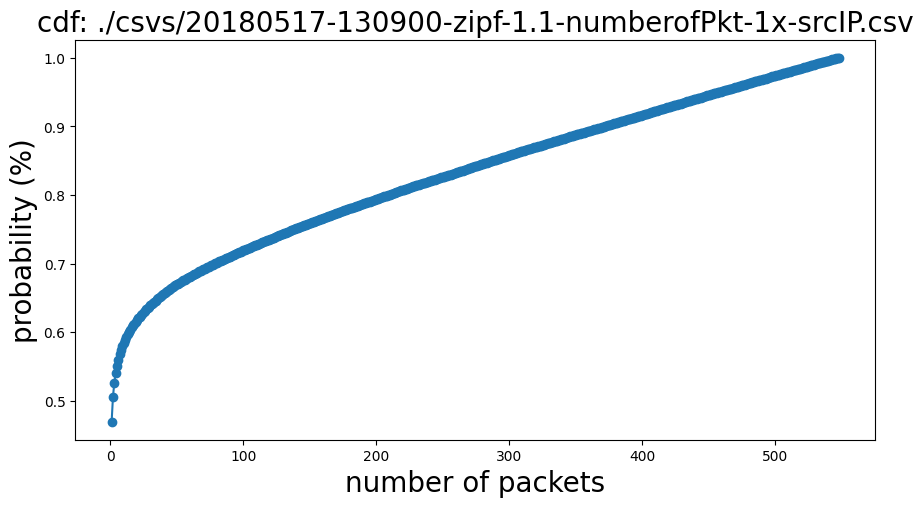

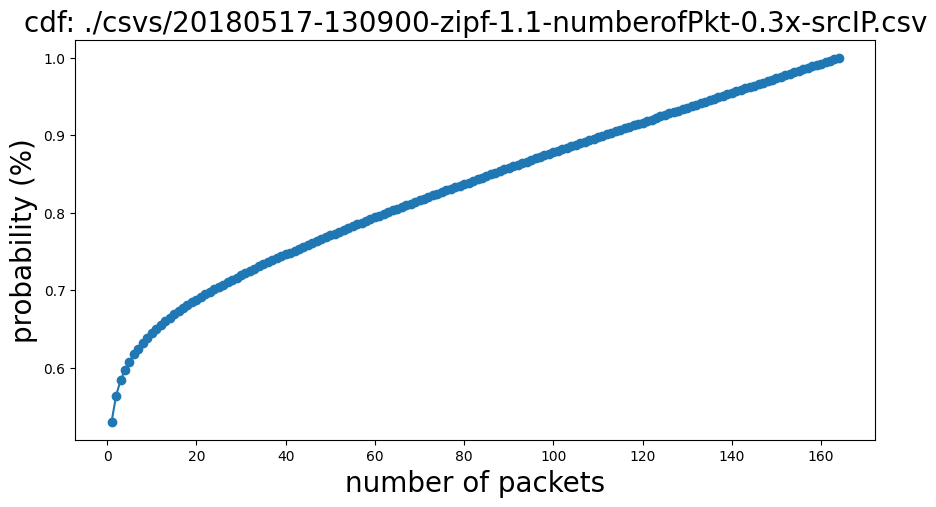

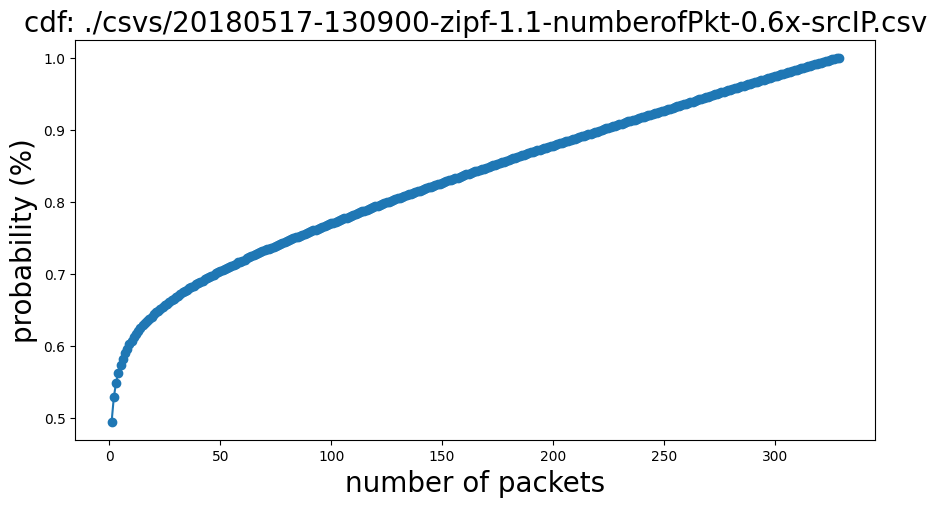

In [14]:
# flowkeys = ['srcip', 'dstip', 'srcport', 'dstport', 'proto']
# flowkeys = ['dstip', 'dstport']
flowkeys = ['srcip']
# flowkeys = ['srcip']

for f in filename_list:
    print(f)
    x, cdf = get_cdf(f, flowkeys)
    # print(f'length: {len(pdf)}, pdf: {pdf[0:3]}')
    # name = f.split('/')[-1].split('.')[2]
    name = str(f)
    # print(name)
    plot_cdf(x, cdf, 'cdf: ' + name)
    # print(f'length: {len(pdf)}, pdf: {pdf[2:10]}')
    # plot_cdf(list(x)[:100], pdf[:100], 'pdf' + name)

./csvs/20180517-130900-zipf-1.1-numberofPkt-1x-srcIP.csv
./csvs/20180517-130900-zipf-1.1-numberofPkt-0.3x-srcIP.csv
./csvs/20180517-130900-zipf-1.1-numberofPkt-0.6x-srcIP.csv


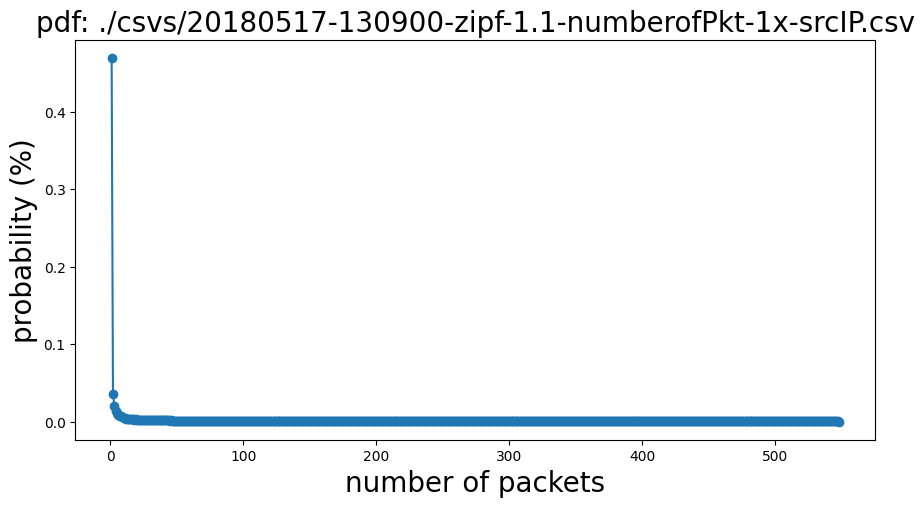

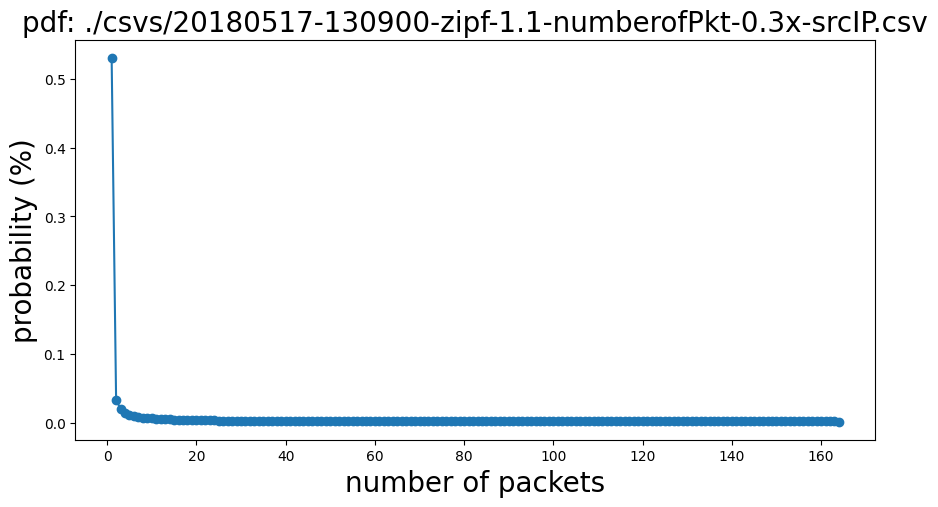

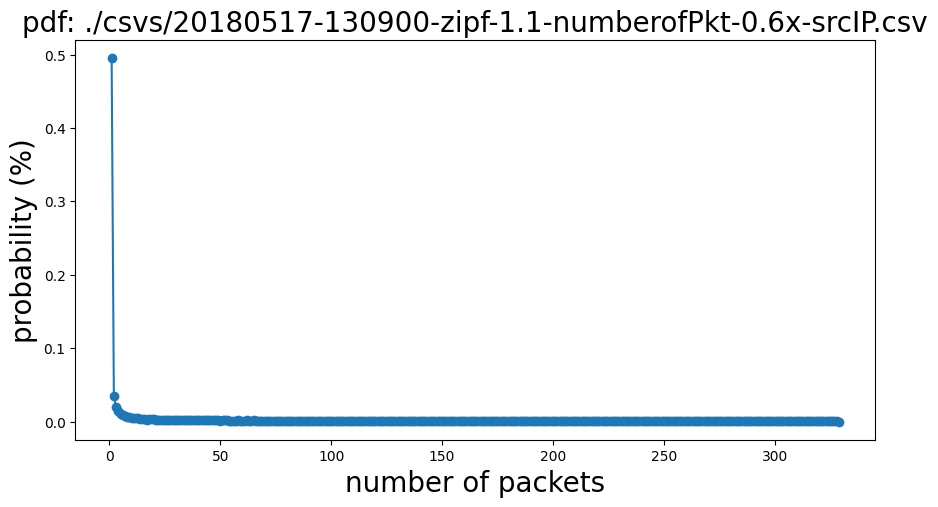

In [15]:
# flowkeys = ['srcip', 'dstip', 'srcport', 'dstport', 'proto']
# flowkeys = ['dstip', 'dstport']
flowkeys = ['srcip']
# flowkeys = ['srcip']
for f in filename_list:
    print(f)
    x, pdf = get_pdf(f, flowkeys)
    # print(f'length: {len(pdf)}, pdf: {pdf[0:3]}')
    # name = f.split('/')[-1].split('.')[2]
    name = str(f)
    # print(name)
    plot_cdf(x, pdf, 'pdf: ' + name)
    # print(f'length: {len(pdf)}, pdf: {pdf[2:10]}')
    # plot_cdf(list(x)[:100], pdf[:100], 'pdf' + name)

In [11]:
my_pdf = copy.deepcopy(pdf)
x_axis = copy.deepcopy(list(x))
print(len(my_pdf))

478


In [67]:
def set_range(pdf = my_pdf, similarity = 0.9):
    ll = []
    ll_pair = []
    
    prev = pdf[0]
    
    idx = 0
    start = 0
    end = 0
    for d in pdf:
        # if d > target:
        #     ll.append(target)
        # else:
        #     ll.append(d)
        diff = abs((prev - d) / prev)
        end += 1
        if diff > similarity:
            idx += 1
            ll_pair.append([start, end])
            start = end
            prev = pdf[start]
        
        ll.append(idx)
    
    if start < len(pdf):
        idx += 1
        ll_pair.append([start, end])
        
        # print(prev)
        # prev = d
    # print(idx)
    print(len(ll_pair))
    print(ll_pair[idx-1])
    
    return ll, ll_pair
ll, ll_pair = set_range()

12
[1005, 4059]


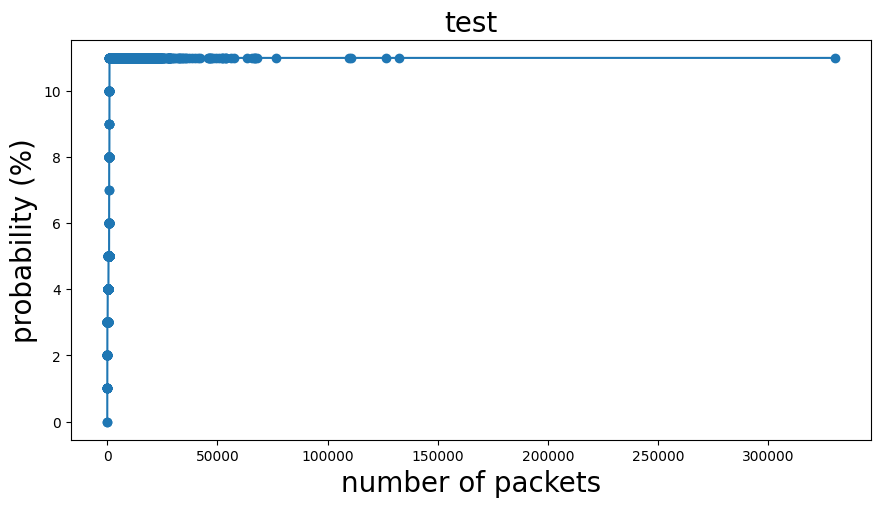

In [68]:
plot_cdf(x_axis, ll, 'test')

In [69]:
def range_sampling(idx_list, pdf = my_pdf, target = 0.0001):
    
    ll = []
    cnt = 0
    for (start, end) in idx_list:
        # print(start, end)
        # print(pdf[start:end])
        # print(pdf[end - 1])
        size = end - start
        last = end - 1
        if np.mean(pdf[start:end]) > target:
            ll += [target] * size
        else:
            ll += [pdf[last]] * size

        # ll += [pdf[last]] * size
        
        cnt += size
        # print(ll)
    print(cnt)
    # for d in pdf:
        # if d > target:
        #     ll.append(target)
        # else:
        #     ll.append(d)
    
    return ll
ret = range_sampling(ll_pair)

4059


In [70]:
def plot_range(key, val, name = '', xlabel='index of flow'):

    # plotting
    fig = plt.figure(figsize = (10, 4))
    ax = fig.add_axes([0, 0, 1, 1])
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel('probability (%)', fontsize=20)

    plt.title(f'{name}', fontsize=20)

    ax.plot(key, val, marker='o')

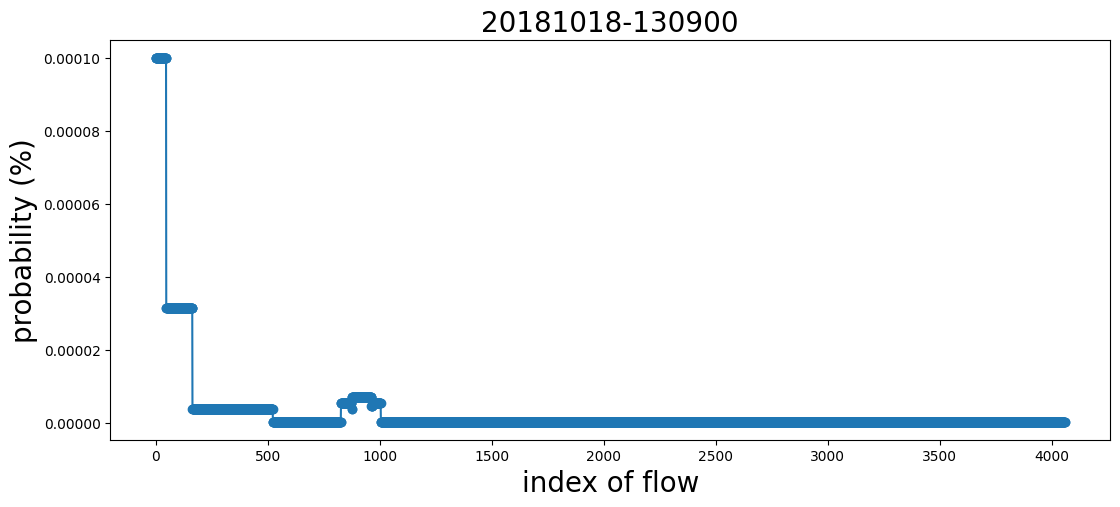

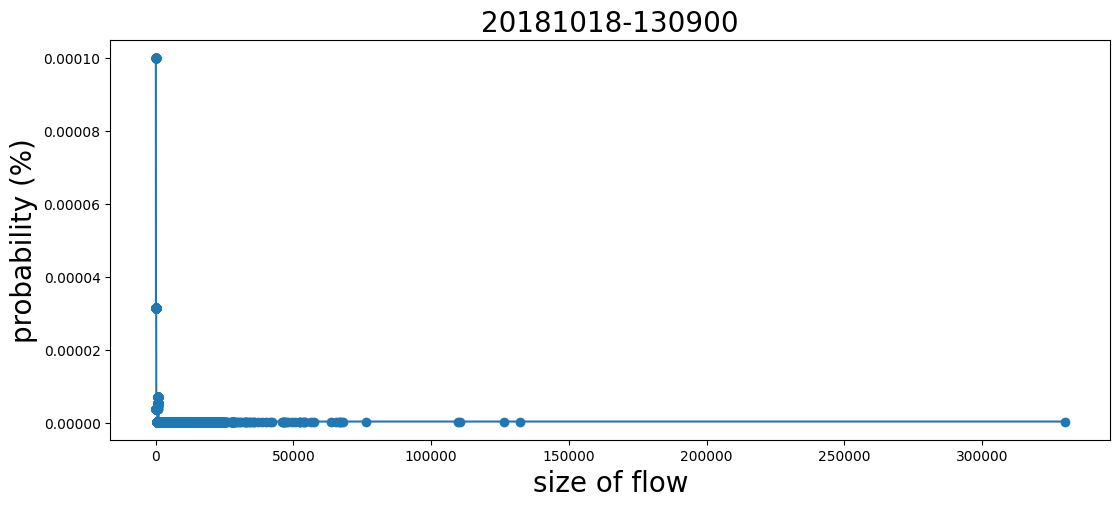

In [71]:
tmp_x = np.arange(len(ret))
plot_range(tmp_x, ret, name)
plot_range(x_axis, ret, name, 'size of flow')